In [240]:
import pandas as pd

In [241]:
df = pd.read_csv('churn.csv')

In [242]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA

In [243]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [244]:
# Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

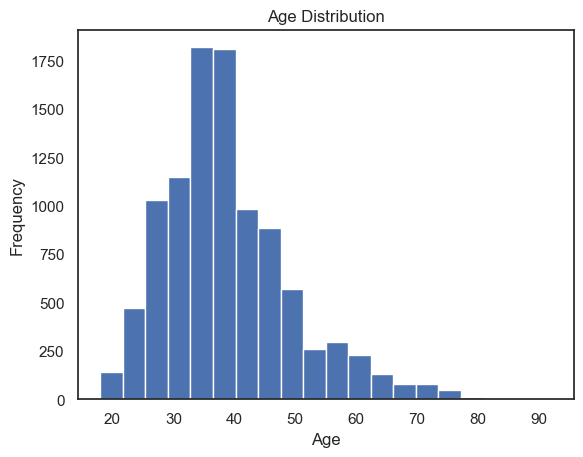

In [245]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


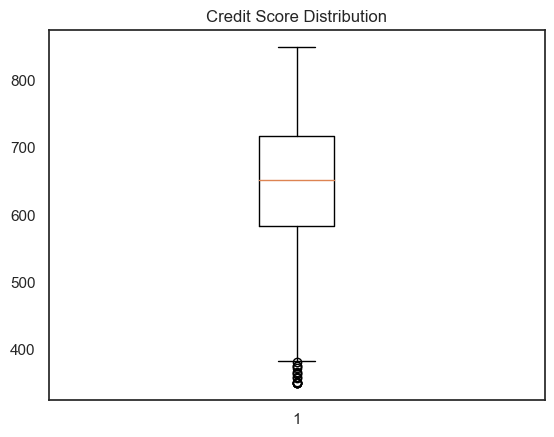

In [246]:
plt.boxplot(df['CreditScore'])
plt.title('Credit Score Distribution')
plt.show()

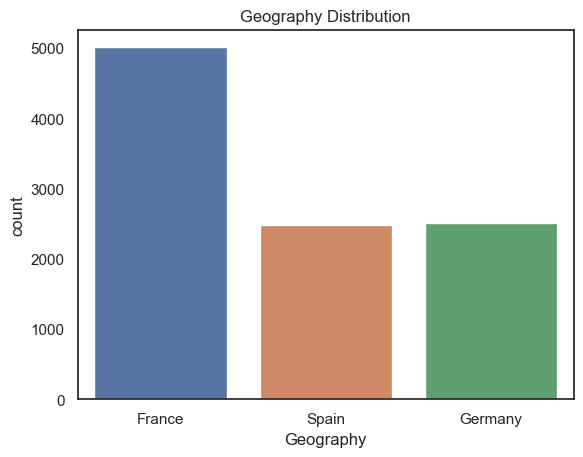

In [247]:
# visualizations
import seaborn as sns

# Bar chart for Geography distribution
sns.countplot(data=df, x='Geography')
plt.title('Geography Distribution')
plt.show()


In [248]:
geography_counts = df['Geography'].value_counts().reset_index()
geography_counts.columns = ['Geography', 'Count']
geography_counts

,Geography,Count
0,France,5014
1,Germany,2509
2,Spain,2477


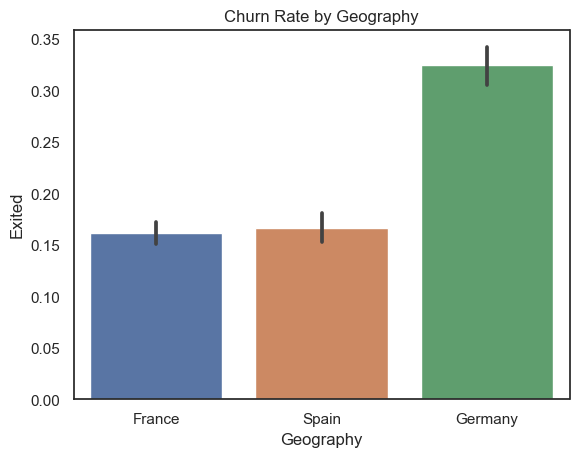

In [249]:
# churn rate
churn_rate = df['Exited'].mean()

# churn rate by different categories
sns.barplot(data=df, x='Geography', y='Exited')
plt.title('Churn Rate by Geography')
plt.show()

In [250]:
#churn rate
churn_rate_by_geography = df.groupby('Geography')['Exited'].mean().reset_index()
churn_rate_by_geography.columns = ['Geography', 'Churn Rate']

churn_rate_by_geography

,Geography,Churn Rate
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


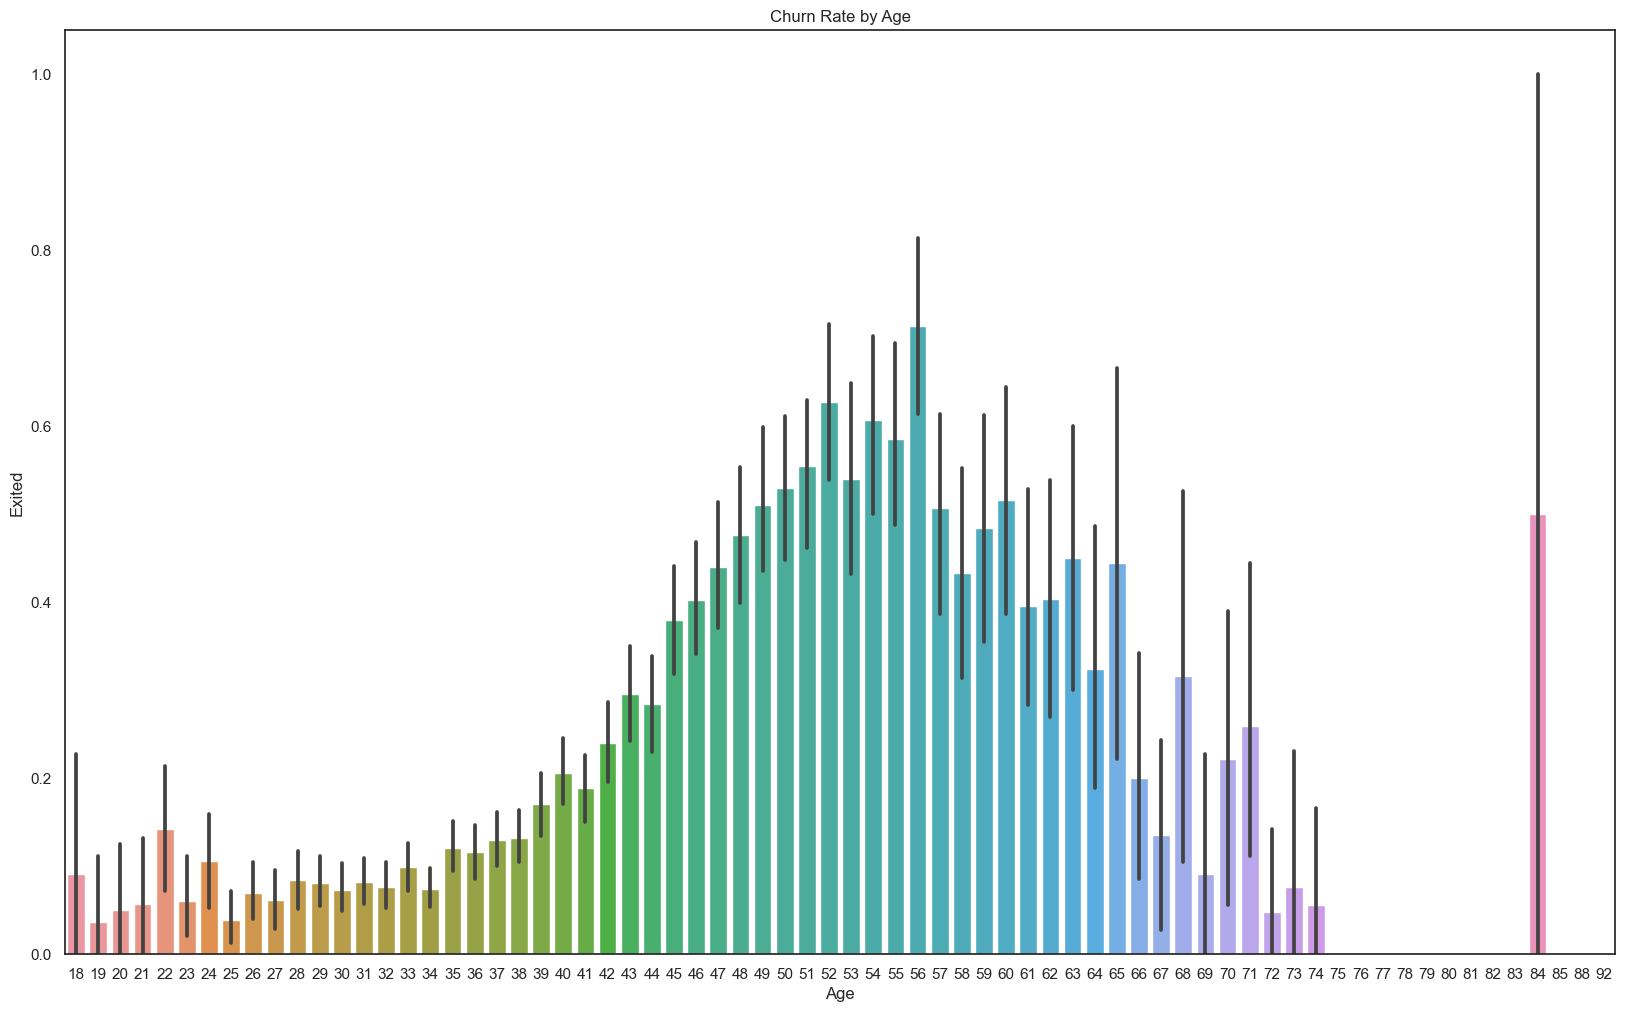

In [251]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df, x='Age', y='Exited')
plt.title('Churn Rate by Age')
plt.show()


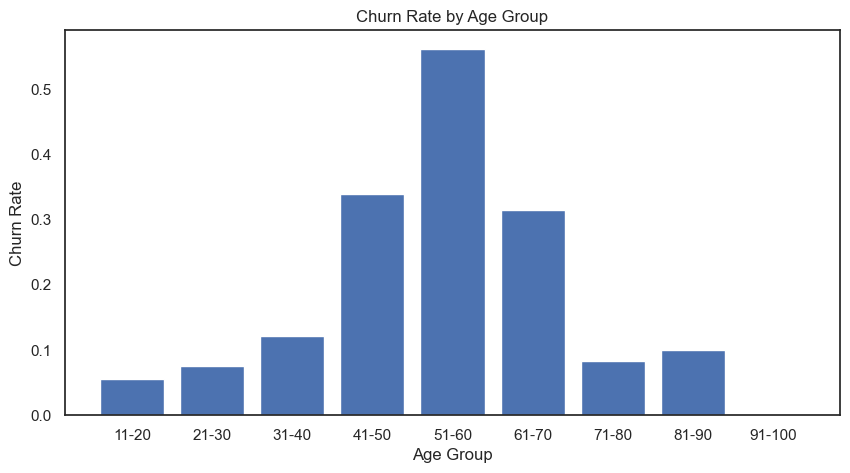

In [252]:
# age groups
age_groups = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

df['AgeGroup'] = pd.cut(df['Age'], bins=age_groups, labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# churn rate by age group
churn_rate_by_age = df.groupby('AgeGroup')['Exited'].mean()

plt.figure(figsize=(10, 5))
plt.bar(churn_rate_by_age.index, churn_rate_by_age.values)
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()

In [253]:
age groups
age_groups = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

df['AgeGroup'] = pd.cut(df['Age'], bins=age_groups, labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
churn_rate_by_age = df.groupby('AgeGroup')['Exited'].mean().reset_index()
churn_rate_by_age.columns = ['Age Group', 'Churn Rate']

churn_rate_by_age

,Age Group,Churn Rate
0,0-10,NaN
1,11-20,0.056180
2,21-30,0.076104
3,31-40,0.120872
4,41-50,0.339655
5,51-60,0.562108
6,61-70,0.314199
7,71-80,0.082645
8,81-90,0.100000
9,91-100,0.000000


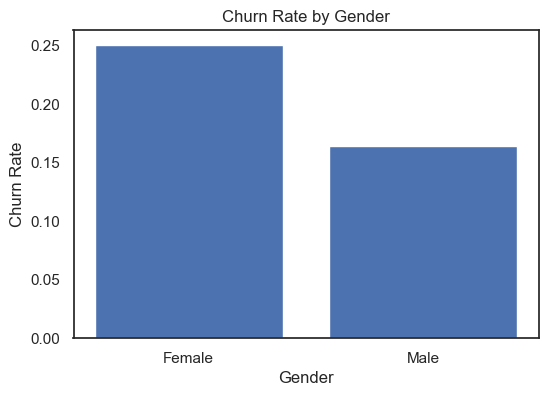

In [254]:
#churn rate by gender
churn_rate_by_gender = df.groupby('Gender')['Exited'].mean()

plt.figure(figsize=(6, 4))
plt.bar(churn_rate_by_gender.index, churn_rate_by_gender.values)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

In [255]:
churn_rate_by_gender = df.groupby('Gender')['Exited'].mean().reset_index()
churn_rate_by_gender.columns = ['Gender', 'Churn Rate']
churn_rate_by_gender

,Gender,Churn Rate
0,Female,0.250715
1,Male,0.164559


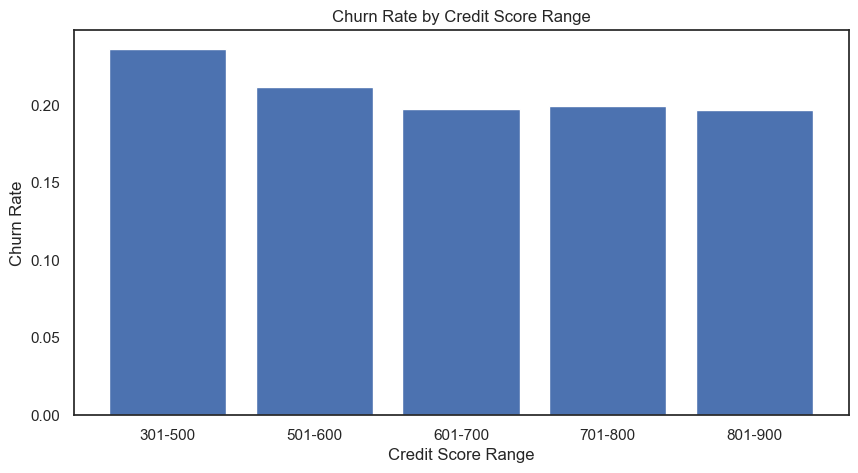

In [256]:
#credit score ranges
credit_score_ranges = [0, 300, 500, 600, 700, 800, 900]

# column 'CreditScoreRange' based on the credit score ranges
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=credit_score_ranges, labels=['0-300', '301-500', '501-600', '601-700', '701-800', '801-900'])

# churn rate by credit score range
churn_rate_by_credit_score = df.groupby('CreditScoreRange')['Exited'].mean()

# Plotting the churn rate by credit score range
plt.figure(figsize=(10, 5))
plt.bar(churn_rate_by_credit_score.index, churn_rate_by_credit_score.values)
plt.title('Churn Rate by Credit Score Range')
plt.xlabel('Credit Score Range')
plt.ylabel('Churn Rate')
plt.show()

In [257]:
#credit score ranges
credit_score_ranges = [0, 300, 500, 600, 700, 800, 900]
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=credit_score_ranges, labels=['0-300', '301-500', '501-600', '601-700', '701-800', '801-900'])
churn_rate_by_credit_score = df.groupby('CreditScoreRange')['Exited'].mean().reset_index()
churn_rate_by_credit_score.columns = ['Credit Score Range', 'Churn Rate']
churn_rate_by_credit_score

,Credit Score Range,Churn Rate
0,0-300,NaN
1,301-500,0.236392
2,501-600,0.211721
3,601-700,0.197224
4,701-800,0.199110
5,801-900,0.196899


In [258]:
#summary statistics for the 'Balance' column
balance_stats = df['Balance'].describe()
balance_stats

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

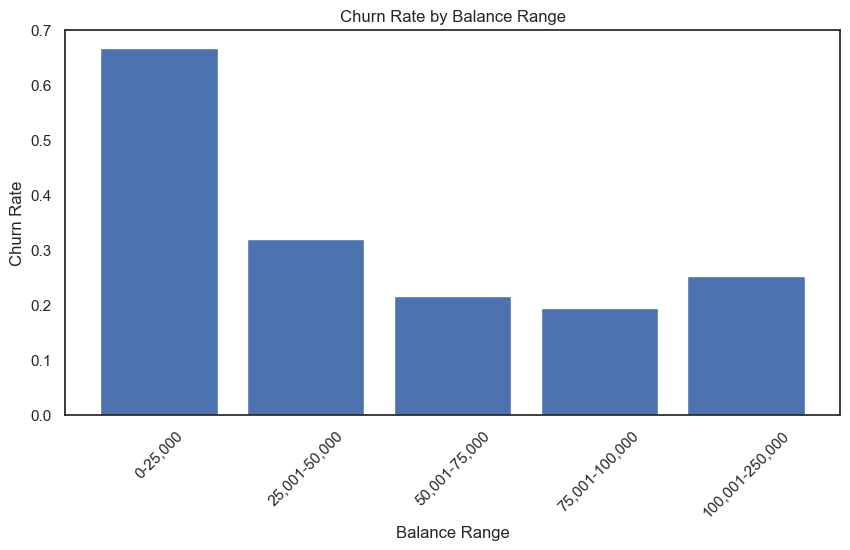

In [259]:
# balance range values in whole numbers
balance_ranges = [0, 25000, 50000, 75000, 100000, 250000]

df['BalanceRange'] = pd.cut(df['Balance'], bins=balance_ranges, labels=['0-25,000', '25,001-50,000', '50,001-75,000', '75,001-100,000', '100,001-250,000'])

# churn rate by balance range
churn_rate_by_balance = df.groupby('BalanceRange')['Exited'].mean()

# Plotting the churn rate by balance range
plt.figure(figsize=(10, 5))
plt.bar(churn_rate_by_balance.index, churn_rate_by_balance.values)
plt.title('Churn Rate by Balance Range')
plt.xlabel('Balance Range')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [260]:
balance_ranges = [0, 25000, 50000, 75000, 100000, 250000]
df['BalanceRange'] = pd.cut(df['Balance'], bins=balance_ranges, labels=['0-25,000', '25,001-50,000', '50,001-75,000', '75,001-100,000', '100,001-250,000'])
churn_rate_by_balance = df.groupby('BalanceRange')['Exited'].mean().reset_index()
churn_rate_by_balance.columns = ['Balance Range', 'Churn Rate']
churn_rate_by_balance

,Balance Range,Churn Rate
0,"0-25,000",0.666667
1,"25,001-50,000",0.318841
2,"50,001-75,000",0.214900
3,"75,001-100,000",0.193966
4,"100,001-250,000",0.252188


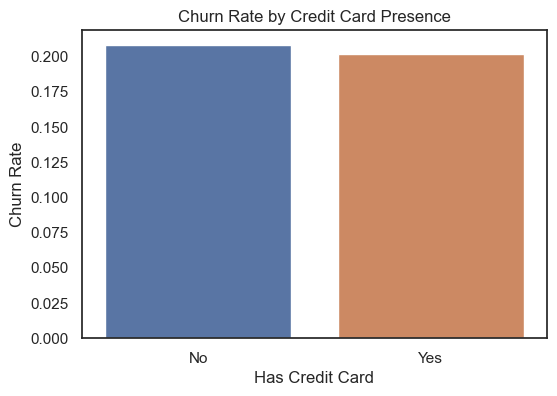

In [261]:
# churn rate by HasCrCard (whether the customer has a credit card)
churn_rate_by_credit_card = df.groupby('HasCrCard')['Exited'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rate_by_credit_card.index, y=churn_rate_by_credit_card.values)
plt.title('Churn Rate by Credit Card Presence')
plt.xlabel('Has Credit Card')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['No', 'Yes'])  # Replace 0 and 1 with 'No' and 'Yes' for better readability
plt.show()

In [262]:
churn_rate_by_credit_card = df.groupby('HasCrCard')['Exited'].mean().reset_index()
churn_rate_by_credit_card.columns = ['Has Credit Card', 'Churn Rate']

churn_rate_by_credit_card['Has Credit Card'] = churn_rate_by_credit_card['Has Credit Card'].replace({0: 'No', 1: 'Yes'})
churn_rate_by_credit_card

,Has Credit Card,Churn Rate
0,No,0.208149
1,Yes,0.201843


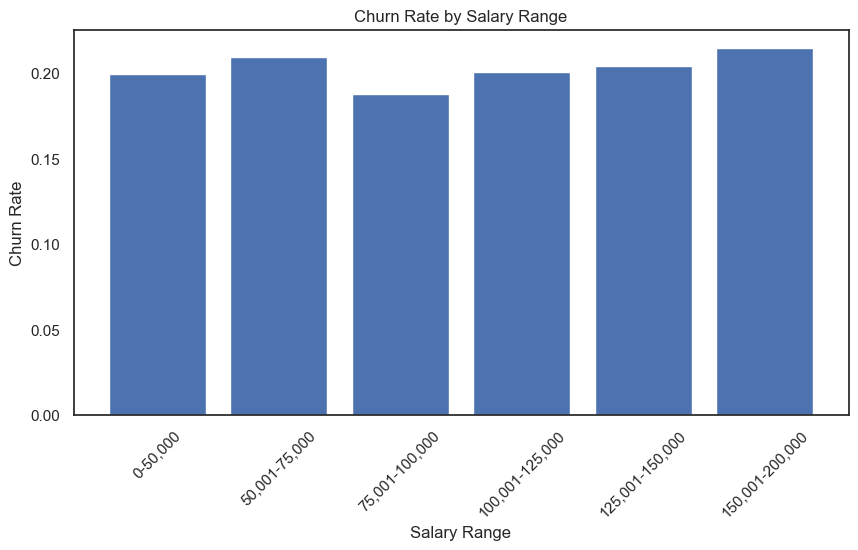

In [264]:
# churn rate by salary range
salary_ranges = [0, 50000, 75000, 100000, 125000, 150000, 200000, 250000]

df['SalaryRange'] = pd.cut(df['EstimatedSalary'], bins=salary_ranges, labels=['0-50,000', '50,001-75,000', '75,001-100,000', '100,001-125,000', '125,001-150,000', '150,001-200,000', '200,001-250,000'])

# Calculating churn rate by salary range
churn_rate_by_salary = df.groupby('SalaryRange')['Exited'].mean()

# Plotting the churn rate by salary range
plt.figure(figsize=(10, 5))
plt.bar(churn_rate_by_salary.index, churn_rate_by_salary.values)
plt.title('Churn Rate by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [265]:
salary_ranges = [0, 50000, 75000, 100000, 125000, 150000, 200000, 250000]
df['SalaryRange'] = pd.cut(df['EstimatedSalary'], bins=salary_ranges, labels=['0-50,000', '50,001-75,000', '75,001-100,000', '100,001-125,000', '125,001-150,000', '150,001-200,000', '200,001-250,000'])
churn_rate_by_salary = df.groupby('SalaryRange')['Exited'].mean().reset_index()
churn_rate_by_salary.columns = ['Salary Range', 'Churn Rate']
churn_rate_by_salary

,Salary Range,Churn Rate
0,"0-50,000",0.199348
1,"50,001-75,000",0.209614
2,"75,001-100,000",0.187697
3,"100,001-125,000",0.200627
4,"125,001-150,000",0.204066
5,"150,001-200,000",0.214664
6,"200,001-250,000",NaN


In [266]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,CreditScoreRange,BalanceRange,SalaryRange
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50,601-700,NaN,"100,001-125,000"
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50,601-700,"75,001-100,000","100,001-125,000"
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50,501-600,"100,001-250,000","100,001-125,000"
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40,601-700,NaN,"75,001-100,000"
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50,801-900,"100,001-250,000","75,001-100,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-40,701-800,NaN,"75,001-100,000"
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-40,501-600,"50,001-75,000","100,001-125,000"
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-40,701-800,NaN,"0-50,000"
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50,701-800,"75,001-100,000","75,001-100,000"


### Dropping unwanted columns and converting Categorical values into Numeric

In [267]:
# dropping unwanted columns 
columns_to_drop = ['CreditScoreRange', 'BalanceRange', 'SalaryRange', 'AgeGroup', 'RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=columns_to_drop)

In [269]:
df = pd.get_dummies(df)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


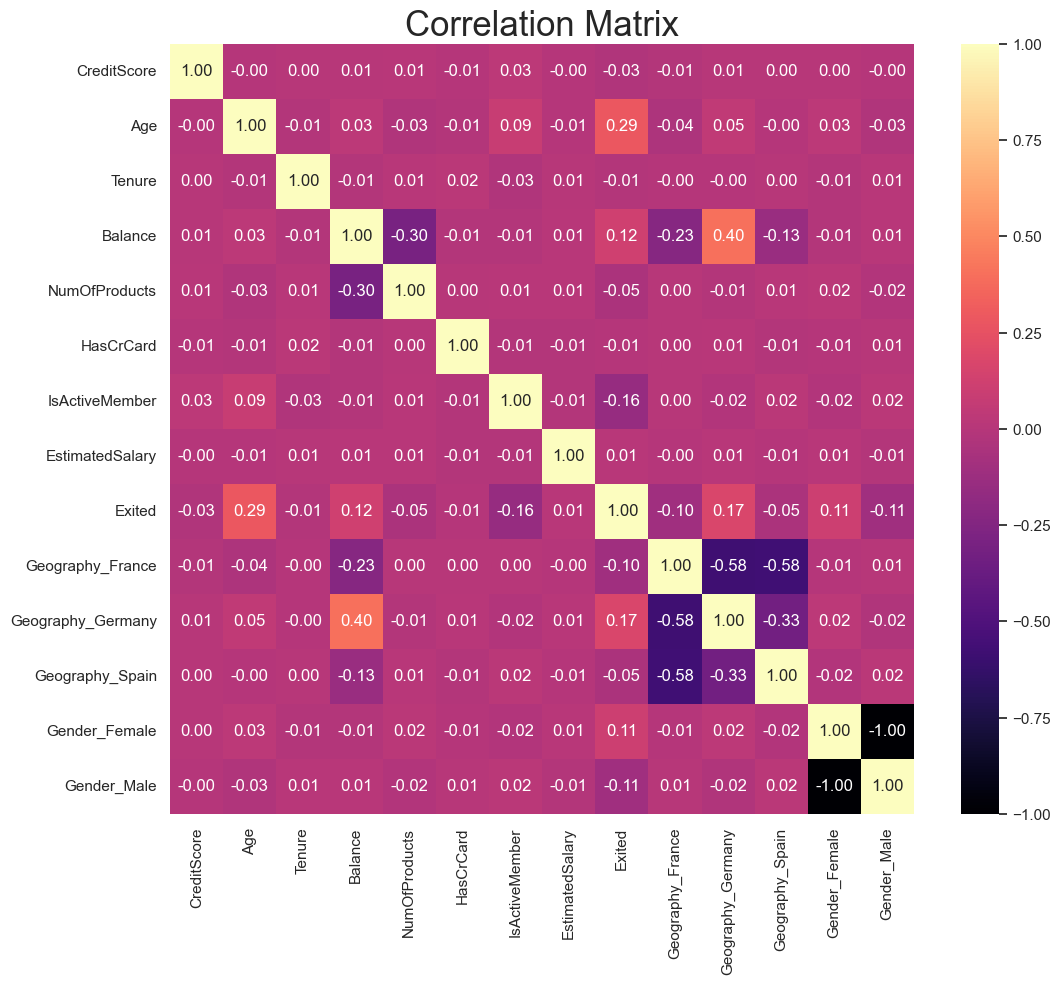

In [271]:
# Correlation Matrix for Wide Format Data
f, ax = plt.subplots(figsize= [12,10])
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", ax=ax, cmap = "magma")
ax.set_title("Correlation Matrix", fontsize=25)
plt.show()

### Applying Machine Learning Models

In [272]:
X = df.drop(labels = ["Exited"],axis = 1)
y = df["Exited"]

In [277]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Fixing class imbalace using over sampling technique

In [278]:
class_counts = df['Exited'].value_counts()
print(class_counts)


0    7963
1    2037
Name: Exited, dtype: int64


In [293]:
from imblearn.over_sampling import SMOTE

# SMOTE resampler
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smo, y_train_smo = smote.fit_resample(X, y)

class_counts = y_resampled.value_counts()
print(class_counts)


1    7963
0    7963
Name: Exited, dtype: int64


In [297]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# predictions on both training and testing sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      5547
           1       0.38      0.06      0.10      1453

    accuracy                           0.78      7000
   macro avg       0.59      0.52      0.49      7000
weighted avg       0.71      0.78      0.72      7000

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest model
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)

y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5547
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000



In [302]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# SVC model
svc_model = SVC()

svc_model.fit(X_train, y_train)

# predictions on both training and testing sets
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5547
           1       0.00      0.00      0.00      1453

    accuracy                           0.79      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.63      0.79      0.70      7000

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



In [303]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()

gradient_boosting_model.fit(X_train, y_train)

# predictions on both training and testing sets
y_train_pred = gradient_boosting_model.predict(X_train)
y_test_pred = gradient_boosting_model.predict(X_test)

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5547
           1       0.80      0.51      0.62      1453

    accuracy                           0.87      7000
   macro avg       0.84      0.74      0.77      7000
weighted avg       0.87      0.87      0.86      7000

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.77      0.48      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

